# Evidencia 1

## Integrantes
- Abiel Moisés Borja García         A01654937
- Gael Eduardo Pérez Gómez          A01753336
- Marco Uriel Pérez Gutiérrez       A01660337
- Sofía Margarita Hernández Muñoz   A01655084

In [45]:
from robot_agents import VacuumModelInt
from agents import VacuumModel

model = VacuumModel(10, 10, 5, 15, 200)
model.run_model()
model_data = model.datacollector.get_model_vars_dataframe()

Vacuum 2 : Moviendo
Vacuum 1 : Moviendo
Vacuum 0 : Moviendo
Vacuum 3 : Moviendo
Vacuum 4 : Moviendo
Stack (1, 1) : 0
Stack (1, 9) : 0
Stack (9, 1) : 0
Stack (9, 9) : 0
Vacuum 1 : Moviendo
Vacuum 0 : Moviendo
Vacuum 2 : Moviendo
Vacuum 4 : Moviendo
Vacuum 3 : Moviendo
Stack (1, 1) : 0
Stack (1, 9) : 0
Stack (9, 1) : 0
Stack (9, 9) : 0
Vacuum 3 : Moviendo
Vacuum 0 : Moviendo
Vacuum 1 : Moviendo
Vacuum 4 : Moviendo
Vacuum 2 : Moviendo
Stack (1, 1) : 0
Stack (1, 9) : 0
Stack (9, 1) : 0
Stack (9, 9) : 0
Vacuum 1 : Cargando
Vacuum 0 : Moviendo
Vacuum 4 : Moviendo
Vacuum 3 : Moviendo
Vacuum 2 : Moviendo
Stack (1, 1) : 0
Stack (1, 9) : 0
Stack (9, 1) : 0
Stack (9, 9) : 0
Vacuum 0 : Moviendo
Vacuum 4 : Moviendo
Vacuum 1 : Cargando
Vacuum 2 : Moviendo
Vacuum 3 : Moviendo
Stack (1, 1) : 0
Stack (1, 9) : 0
Stack (9, 1) : 0
Stack (9, 9) : 0
Vacuum 1 : Cargando
Vacuum 3 : Moviendo
Vacuum 4 : Moviendo
Vacuum 0 : Moviendo
Vacuum 2 : Cargando
Stack (1, 1) : 0
Stack (1, 9) : 0
Stack (9, 1) : 0
Stack (9,

In [46]:
int_model = VacuumModelInt(10, 10, 5, 15, 200)
int_model.run_model()
int_model_data = int_model.datacollector.get_model_vars_dataframe()

Caja 0 : (5, 2)
Caja 1 : (2, 9)
Caja 2 : (9, 5)
Caja 3 : (2, 6)
Caja 4 : (7, 9)
Caja 5 : (2, 7)
Caja 6 : (8, 3)
Caja 7 : (4, 4)
Caja 8 : (3, 0)
Caja 9 : (3, 1)
Caja 10 : (7, 2)
Caja 11 : (2, 0)
Caja 12 : (8, 8)
Caja 13 : (7, 3)
Caja 14 : (1, 6)
Vacuum 1 : Moviendo , stack: (1, 9) , pos: (1, 7)
Vacuum 4 : Moviendo , stack: (5, 5) , pos: (4, 0)
Vacuum 3 : Moviendo , stack: (9, 9) , pos: (7, 8)
Vacuum 0 : Moviendo , stack: (1, 1) , pos: (0, 3)
Vacuum 2 : Moviendo , stack: (9, 1) , pos: (7, 3)
Stack (1, 1) : 0
Stack (1, 9) : 0
Stack (9, 1) : 0
Stack (9, 9) : 0
Stack (5, 5) : 0
Total boxes in stacks: 0
Vacuum 1 : Cargando , stack: (1, 9) , pos: (1, 6)
Vacuum 4 : Moviendo , stack: (5, 5) , pos: (4, 1)
Vacuum 0 : Moviendo , stack: (1, 1) , pos: (0, 2)
Vacuum 3 : Moviendo , stack: (9, 9) , pos: (7, 8)
Vacuum 2 : Cargando , stack: (9, 1) , pos: (7, 2)
Stack (1, 1) : 0
Stack (1, 9) : 0
Stack (9, 1) : 0
Stack (9, 9) : 0
Stack (5, 5) : 0
Total boxes in stacks: 0
Vacuum 2 : Cargando , stack: (9, 1)

Last step: 201


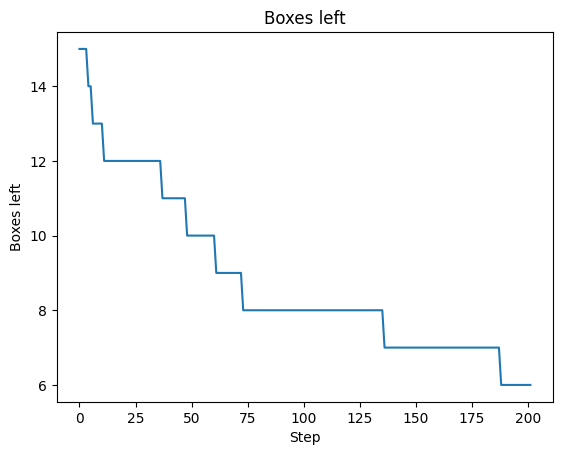

In [47]:
# Boxes left
boxes_left = model_data['boxe cells']
plot = boxes_left.plot(title="Boxes left")
plot.set_xlabel("Step")
plot.set_ylabel("Boxes left")

# Get last step
last_step = model.schedule.steps
print("Last step:", last_step)

Last step: 62


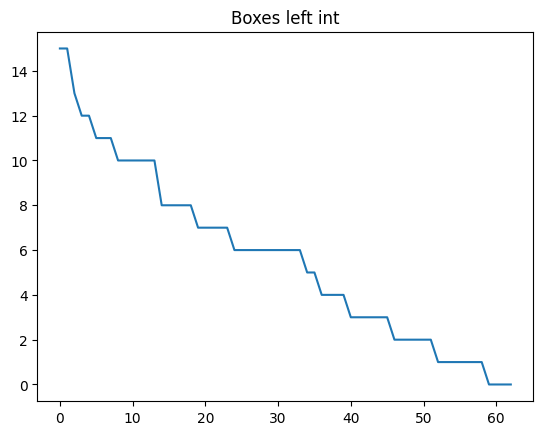

In [48]:
int_boxes_left = int_model_data['boxe cells']
plot = int_boxes_left.plot(title="Boxes left int")

# Get last step
last_step = int_model.schedule.steps
print("Last step:", last_step)


## Batch Runner

In [33]:
import mesa
from robot_agents import VacuumModelInt
from agents import VacuumModel

# Create the model
# Batch run parameters
# VacuumModel(width: int, height: int, N: int, boxeCells: int, max_steps: int = 10
fixed_params = {"width": 10,
                "height": 10,
                "N": 5,
                "boxeCells": range(10, 17),
                "max_steps": 200}

# Save batch run data
batch_run = mesa.batch_run(
    VacuumModel,
    parameters=fixed_params,
    iterations=3,
    # max_steps=200,
    number_processes=2,
    data_collection_period=1,
    display_progress=True
)

100%|██████████| 21/21 [00:01<00:00, 20.62it/s]


In [34]:
import pandas as pd
import matplotlib.pyplot as plt

# Get the data
df = pd.DataFrame(batch_run)

In [40]:
# Save batch run data int
batch_run_int = mesa.batch_run(
    VacuumModelInt,
    parameters=fixed_params,
    iterations=3,
    # max_steps=200,
    number_processes=2,
    data_collection_period=1,
    display_progress=True
)

100%|██████████| 21/21 [00:00<00:00, 27.72it/s]


In [41]:
# Get the data
df_int = pd.DataFrame(batch_run_int)

Text(0.5, 1.0, 'Boxes left mean')

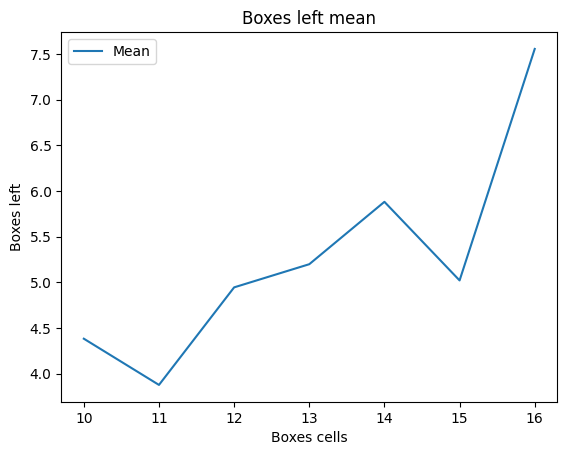

In [55]:
# Get the mean and standard deviation of the number of boxes left
mean = df.groupby("boxeCells")["boxe cells"].mean()
# std = df.groupby("boxeCells")["boxe cells"].std()

# Get the mean and standard deviation of the number of boxes left int
mean_int = df_int.groupby("boxeCells")["boxe cells"].mean()
# std_int = df_int.groupby("boxeCells")["boxe cells"].std()

# Plot the mean and standard deviation
plt.plot(mean, label="Mean")
# plt.plot(std, label="Standard deviation")
plt.legend()
plt.xlabel("Boxes cells")
plt.ylabel("Boxes left")
plt.title("Boxes left mean")


Text(0.5, 1.0, 'Boxes left mean int')

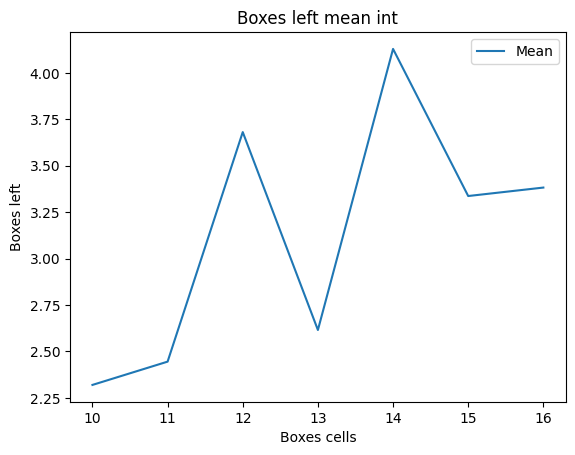

In [56]:
# Plot the mean and standard deviation int
plt.plot(mean_int, label="Mean")
# plt.plot(std_int, label="Standard deviation")
plt.legend()
plt.xlabel("Boxes cells")
plt.ylabel("Boxes left")
plt.title("Boxes left mean int")


Text(0.5, 1.0, 'Mean steps')

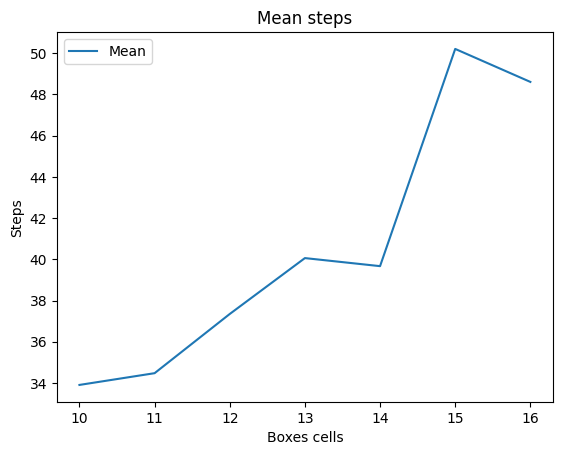

In [51]:
# Get the mean of steps
mean_steps = df.groupby("boxeCells")["Total moves"].mean()
# print(mean_steps)
# std_steps = df.groupby("boxeCells")["Step"].std()

# Get the mean of steps int
mean_steps_int = df_int.groupby("boxeCells")["Total moves"].mean()
# std_steps_int = df_int.groupby("boxeCells")["Step"].std()

# Plot the mean and standard deviation
plt.plot(mean_steps, label="Mean")
# plt.plot(std_steps, label="Standard deviation")
plt.legend()
plt.xlabel("Boxes cells")
plt.ylabel("Steps")
plt.title("Mean steps")


Text(0.5, 1.0, 'Mean steps int')

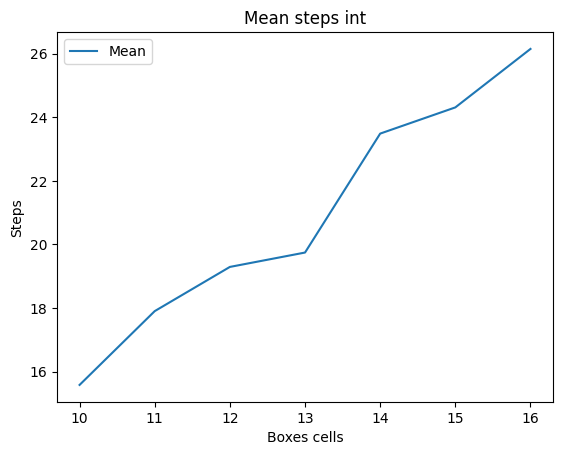

In [52]:
# Plot the mean and standard deviation int
plt.plot(mean_steps_int, label="Mean")
# plt.plot(std_steps_int, label="Standard deviation")
plt.legend()
plt.xlabel("Boxes cells")
plt.ylabel("Steps")
plt.title("Mean steps int")


Text(0.5, 1.0, 'Max steps mean')

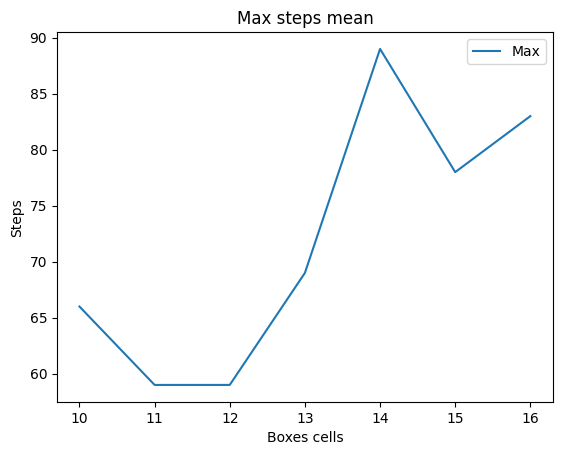

In [57]:
# Get the max of steps
max_steps = df.groupby("boxeCells")["Total moves"].max()
# print(max_steps)
# std_steps = df.groupby("boxeCells")["Step"].std()

# Get the max of steps int
max_steps_int = df_int.groupby("boxeCells")["Total moves"].max()
# std_steps_int = df_int.groupby("boxeCells")["Step"].std()

# Plot the mean and standard deviation
plt.plot(max_steps, label="Max")
# plt.plot(std_steps, label="Standard deviation")
plt.legend()
plt.xlabel("Boxes cells")
plt.ylabel("Steps")
plt.title("Max steps mean")


Text(0.5, 1.0, 'Max steps int')

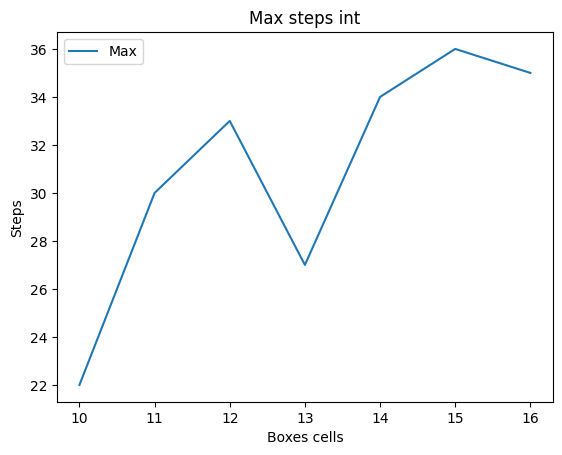

In [54]:
# Plot the mean and standard deviation int
plt.plot(max_steps_int, label="Max")
# plt.plot(std_steps_int, label="Standard deviation")
plt.legend()
plt.xlabel("Boxes cells")
plt.ylabel("Steps")
plt.title("Max steps int")
